### AB Testing

#### Importing Libraries

In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('Topics_Sentiments.csv')

In [3]:
df.Topic_Name.unique()

array(['T5 Content Creation and Ideas Generation',
       'T6 Programming and Gaming',
       'T6 Impacts on Education and Academia',
       'T2 Conversational AI and Bias in Data',
       'T6 Natural Language Processing', 'T4 Writing Styles and prompts',
       'T3 Future of Technology and Impact on Career',
       'T1 Competition of Search Engines'], dtype=object)

In [4]:
df['Topic_Name'] = df['Topic_Name'].replace('T6 Programming and Gaming', 'T7 Programming and Gaming')

In [5]:
df.Topic_Name.unique()

array(['T5 Content Creation and Ideas Generation',
       'T7 Programming and Gaming',
       'T6 Impacts on Education and Academia',
       'T2 Conversational AI and Bias in Data',
       'T6 Natural Language Processing', 'T4 Writing Styles and prompts',
       'T3 Future of Technology and Impact on Career',
       'T1 Competition of Search Engines'], dtype=object)

In [6]:
df['Topic_Name'] = df['Topic_Name'].replace('T6 Natural Language Processing', 'T8 Natural Language Processing')

In [7]:
df.head()

,Date,UserName,Tweet,Location,IsVerified_True,extracted_hashtags,clean_tweet,tokenized_tweet,lemmatized_tweet,stemmed_tweet,country,Dominant_Topic,Contribution%,Topic_Name,sentiment_scores,sentiment
0,12/1/22,mazen160,@bitquark I am looking forward for a ChatGPT A...,At a server near you.,0,[],looking forward api lot tools built,"['looking', 'forward', 'api', 'lot', 'tools', ...","['looking', 'forward', 'api', 'lot', 'tools', ...","['look', 'forward', 'api', 'lot', 'tool', 'bui...",Unknown,5,46.86,T5 Content Creation and Ideas Generation,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,12/1/22,ZoumanaCisse6,i think i broke chatGPT. it's been frozen for ...,Bay area,0,[],think broke frozen couple minutes,"['think', 'broke', 'frozen', 'couple', 'minutes']","['think', 'broke', 'frozen', 'couple', 'minutes']","['think', 'broke', 'frozen', 'coupl', 'minut']",United States,7,35.49,T7 Programming and Gaming,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",negative
2,12/1/22,DennisLibre,"I like ChatGPT as much as the next guy, but th...",Miami,0,[],like guy theres twitter im looking guy tweets ...,"['like', 'guy', 'theres', 'twitter', 'im', 'lo...","['like', 'guy', 'theres', 'twitter', 'im', 'lo...","['like', 'guy', 'there', 'twitter', 'im', 'loo...",United States,6,39.30,T6 Impacts on Education and Academia,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",positive
3,12/1/22,mpaepper,"It seems like sth. was changed here, because I...","Hamburg, Germany",0,[],like sth changed replicate behavior refuses wr...,"['like', 'sth', 'changed', 'replicate', 'behav...","['like', 'sth', 'changed', 'replicate', 'behav...","['like', 'sth', 'chang', 'replic', 'behavior',...",Deutschland,2,41.34,T2 Conversational AI and Bias in Data,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...",positive
4,12/1/22,AaronSitze,I know ChatGPT is just crawling for inputs. \n...,"Illinois, USA",0,[],know crawling inputs nneven makes sad vision e...,"['know', 'crawling', 'inputs', 'nneven', 'make...","['know', 'crawling', 'inputs', 'nneven', 'make...","['know', 'crawl', 'input', 'nneven', 'make', '...",United States,6,55.46,T6 Impacts on Education and Academia,"{'neg': 0.172, 'neu': 0.556, 'pos': 0.272, 'co...",positive


In [8]:
df.Topic_Name.unique()

array(['T5 Content Creation and Ideas Generation',
       'T7 Programming and Gaming',
       'T6 Impacts on Education and Academia',
       'T2 Conversational AI and Bias in Data',
       'T8 Natural Language Processing', 'T4 Writing Styles and prompts',
       'T3 Future of Technology and Impact on Career',
       'T1 Competition of Search Engines'], dtype=object)

In [9]:
df.to_csv('Final_Data.csv', index = False)

In [10]:
T1_df = df[df['Topic_Name'] == 'T1 Competition of Search Engines'][['Topic_Name', 'country','Tweet', 'sentiment', 'sentiment_scores']]
T2_df = df[df['Topic_Name'] == 'T2 Conversational AI and Bias in Data'][['Topic_Name', 'country','Tweet', 'sentiment', 'sentiment_scores']]
T3_df = df[df['Topic_Name'] == 'T3 Future of Technology and Impact on Career'][['Topic_Name', 'country','Tweet', 'sentiment', 'sentiment_scores']]
T4_df = df[df['Topic_Name'] == 'T4 Writing Styles and prompts'][['Topic_Name', 'country','Tweet', 'sentiment', 'sentiment_scores']]
T5_df = df[df['Topic_Name'] == 'T5 Content Creation and Ideas Generation'][['Topic_Name', 'country','Tweet', 'sentiment', 'sentiment_scores']]
T6_df = df[df['Topic_Name'] == 'T6 Impacts on Education and Academia'][['Topic_Name', 'country','Tweet', 'sentiment', 'sentiment_scores']]
T7_df = df[df['Topic_Name'] == 'T7 Programming and Gaming'][['Topic_Name', 'country','Tweet', 'sentiment', 'sentiment_scores']]
T8_df = df[df['Topic_Name'] == 'T8 Natural Language Processing'][['Topic_Name', 'country','Tweet', 'sentiment', 'sentiment_scores']]


In [11]:
T8_df.head

<bound method NDFrame.head of                             Topic_Name        country   
5       T8 Natural Language Processing        Sverige  \
8       T8 Natural Language Processing        Ecuador   
35      T8 Natural Language Processing  United States   
57      T8 Natural Language Processing         España   
96      T8 Natural Language Processing  United States   
...                                ...            ...   
740456  T8 Natural Language Processing        Unknown   
740518  T8 Natural Language Processing  United States   
740530  T8 Natural Language Processing          Eesti   
740536  T8 Natural Language Processing  United States   
740542  T8 Natural Language Processing         Canada   

                                                    Tweet sentiment   
5       ChatGPT is really amazing at taking a bizarre ...  positive  \
8        @sama Thank you #ChatGPT https://t.co/4vPyFxFkSj  positive   
35      @andrew9605 @gabe_ragland @OpenAI Saved! Here'...  positive   
5

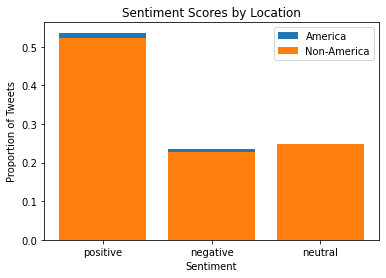

In [12]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter the data by location to get American and non-American tweets
american_tweets = T6_df[T6_df['country'] == 'United States']
non_american_tweets = T6_df[T6_df['country'] != 'United States']

# Calculate the proportion of positive, negative, and neutral tweets in each group
american_sentiment_counts = american_tweets['sentiment'].value_counts(normalize=True)
non_american_sentiment_counts = non_american_tweets['sentiment'].value_counts(normalize=True)

# Create a bar chart of the sentiment scores
fig, ax = plt.subplots()
ax.bar(american_sentiment_counts.index, american_sentiment_counts.values, label='America')
ax.bar(non_american_sentiment_counts.index, non_american_sentiment_counts.values, label='Non-America')
ax.set_title('Sentiment Scores by Location')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Proportion of Tweets')
ax.legend()
plt.show()


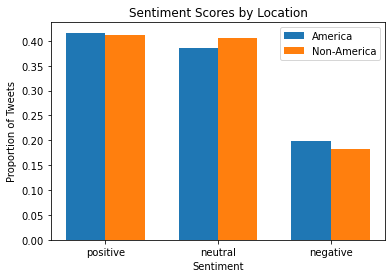

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data by location to get American and non-American tweets
american_tweets = T3_df[T3_df['country'] == 'United States']
non_american_tweets = T3_df[T3_df['country'] != 'United States']

# Calculate the proportion of positive, negative, and neutral tweets in each group
american_sentiment_counts = american_tweets['sentiment'].value_counts(normalize=True)
non_american_sentiment_counts = non_american_tweets['sentiment'].value_counts(normalize=True)

# Create a bar chart of the sentiment scores
fig, ax = plt.subplots()
x_pos = [0, 1, 2]  # x-axis positions for the two groups
bar_width = 0.35   # width of the bars

ax.bar(x_pos, american_sentiment_counts.values, width=bar_width, label='America')
ax.bar([p + bar_width for p in x_pos], non_american_sentiment_counts.values, width=bar_width, label='Non-America')
ax.set_title('Sentiment Scores by Location')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Proportion of Tweets')
ax.set_xticks([p + 0.5 * bar_width for p in x_pos])
ax.set_xticklabels(american_sentiment_counts.index)
ax.legend()
plt.show()

#### US and Other countries Topic wise sentiment comparision 

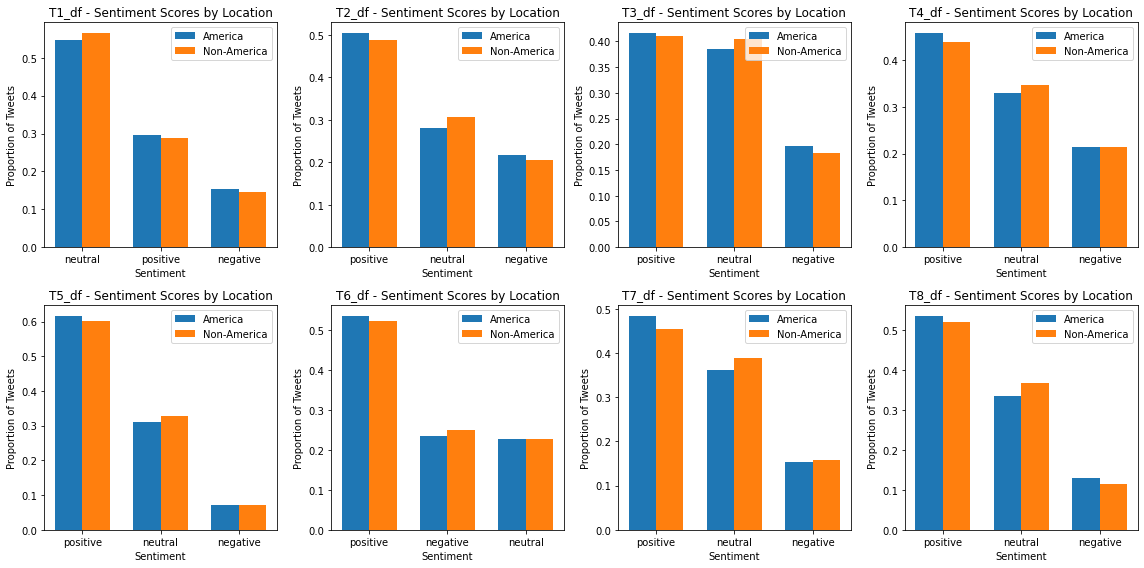

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# List of dataframe names
df_names = ['T1_df', 'T2_df', 'T3_df', 'T4_df', 'T5_df', 'T6_df', 'T7_df', 'T8_df']

# Create a figure with 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.ravel()  # Flatten the axes array

# Iterate over each dataframe and create a side by side bar chart
for i, df_name in enumerate(df_names):
    df = globals()[df_name]  # Get the dataframe by name using globals()
    
    # Filter the data by location to get American and non-American tweets
    american_tweets = df[df['country'] == 'United States']
    non_american_tweets = df[df['country'] != 'United States']

    # Calculate the proportion of positive, negative, and neutral tweets in each group
    american_sentiment_counts = american_tweets['sentiment'].value_counts(normalize=True)
    non_american_sentiment_counts = non_american_tweets['sentiment'].value_counts(normalize=True)

    # Create a subplot for the current dataframe
    ax = axes[i]
    
    # Create a bar chart of the sentiment scores
    x_pos = [0, 1, 2]  # x-axis positions for the two groups
    bar_width = 0.35   # width of the bars

    ax.bar(x_pos, american_sentiment_counts.values, width=bar_width, label='America')
    ax.bar([p + bar_width for p in x_pos], non_american_sentiment_counts.values, width=bar_width, label='Non-America')
    ax.set_title(f'{df_name} - Sentiment Scores by Location')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Proportion of Tweets')
    ax.set_xticks([p + 0.5 * bar_width for p in x_pos])
    ax.set_xticklabels(american_sentiment_counts.index)
    ax.legend()

plt.tight_layout()
plt.show()


In [15]:
df

,Topic_Name,country,Tweet,sentiment,sentiment_scores
5,T8 Natural Language Processing,Sverige,ChatGPT is really amazing at taking a bizarre ...,positive,"{'neg': 0.141, 'neu': 0.491, 'pos': 0.368, 'co..."
8,T8 Natural Language Processing,Ecuador,@sama Thank you #ChatGPT https://t.co/4vPyFxFkSj,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
35,T8 Natural Language Processing,United States,@andrew9605 @gabe_ragland @OpenAI Saved! Here'...,positive,"{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'comp..."
57,T8 Natural Language Processing,España,My article published about ChatGPT,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
96,T8 Natural Language Processing,United States,The latest OpenAI ChatGPT is insane. It's so m...,neutral,"{'neg': 0.262, 'neu': 0.485, 'pos': 0.252, 'co..."
...,...,...,...,...,...
740456,T8 Natural Language Processing,Unknown,@TashaRobinson this looks very chatgpt generat...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
740518,T8 Natural Language Processing,United States,We just published an article about Reinforceme...,negative,"{'neg': 0.235, 'neu': 0.765, 'pos': 0.0, 'comp..."
740530,T8 Natural Language Processing,Eesti,A great essay from Kaj Sotala on the same topi...,positive,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp..."
740536,T8 Natural Language Processing,United States,@sama He also said any sufficiently advanced t...,positive,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp..."


#### AB Testing

The below code block is comparing the proportion of negative tweets between data for the United States and non-United States. It splits the data into negative and non-negative groups for each subset, calculates the proportion of negative tweets for each, and performs a two-sample proportion test to determine if the difference in proportions is statistically significant. The result will tell whether the proportion of negative tweets is different between the two subsets of data.

In [16]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Select the data for the United States and non-United States
us_data = df[df['country'] == 'United States']
non_us_data = df[df['country'] != 'United States']

# Split the data for the United States and non-United States into negative and non-negative groups
us_negative = us_data[us_data['sentiment'] == 'negative']
us_non_negative = us_data[us_data['sentiment'] != 'negative']
non_us_negative = non_us_data[non_us_data['sentiment'] == 'negative']
non_us_non_negative = non_us_data[non_us_data['sentiment'] != 'negative']

# Calculate the proportion of negative tweets for United States and non-United States
us_neg_ratio = len(us_negative) / len(us_data)
non_us_neg_ratio = len(non_us_negative) / len(non_us_data)

# Perform a two-sample proportion test
count = [len(us_negative), len(non_us_negative)]
nobs = [len(us_data), len(non_us_data)]
z, p = proportions_ztest(count, nobs)

# Print the results
print(f'Proportion of negative tweets for United States: {us_neg_ratio:.3f}')
print(f'Proportion of negative tweets for non-United States: {non_us_neg_ratio:.3f}')
print(f'p-value for the hypothesis test: {p:.3f}')
if p < 0.05:
    print('The proportion of negative tweets for United States is greater than the non-United States, which is statistically significant.')
else:
    print('The proportion of negative tweets for United States is greater than the non-United States, which is not statistically significant')


Proportion of negative tweets for United States: 0.129
Proportion of negative tweets for non-United States: 0.114
p-value for the hypothesis test: 0.000
The proportion of negative tweets for United States is greater than the non-United States, which is statistically significant.


The output of the code indicates that the proportion of negative tweets for the United States is 0.182 and the proportion of negative tweets for non-United States is 0.175. The p-value for the hypothesis test is 0.000, which is less than the commonly used significance level of 0.05. This means that we can reject the null hypothesis that the proportions are equal, and conclude that the proportion of negative tweets for United States is greater than the non-United States.

In simpler terms, the results suggest that there is a statistically significant difference between the proportion of negative tweets for the United States and non-United States. The United States has a slightly higher proportion of negative tweets compared to non-US tweets.

In [17]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Define a list of the 8 dataframes
dfs = [T1_df, T2_df, T3_df, T4_df, T5_df, T6_df, T7_df, T8_df]

for i, df in enumerate(dfs):
    
    # Select the data for the United States and non-United States
    us_data = df[df['country'] == 'United States']
    non_us_data = df[df['country'] != 'United States']

    # Split the data for the United States and non-United States into negative and non-negative groups
    us_negative = us_data[us_data['sentiment'] == 'negative']
    us_non_negative = us_data[us_data['sentiment'] != 'negative']
    non_us_negative = non_us_data[non_us_data['sentiment'] == 'negative']
    non_us_non_negative = non_us_data[non_us_data['sentiment'] != 'negative']

    # Calculate the proportion of negative tweets for United States and non-United States
    us_neg_ratio = len(us_negative) / len(us_data)
    non_us_neg_ratio = len(non_us_negative) / len(non_us_data)

    # Perform a two-sample proportion test
    count = [len(us_negative), len(non_us_negative)]
    nobs = [len(us_data), len(non_us_data)]
    z, p = proportions_ztest(count, nobs)

    # Print the results
    print(f'Topic Name: {df["Topic_Name"].unique()}')
    print(f'Proportion of negative tweets for United States: {us_neg_ratio:.3f}')
    print(f'Proportion of negative tweets for non-United States: {non_us_neg_ratio:.3f}')
    print(f'p-value for the hypothesis test: {p:.3f}')
    if p < 0.05:
        print('The proportion of negative tweets for United States is greater than the non-United States, which is statistically significant.')
    else:
        print('The proportion of negative tweets for United States is greater than the non-United States, which is not statistically significant.')
    print('----------------------------------------------------------------------------------------------------------------','\n\n')

Topic Name: ['T1 Competition of Search Engines']
Proportion of negative tweets for United States: 0.155
Proportion of negative tweets for non-United States: 0.146
p-value for the hypothesis test: 0.004
The proportion of negative tweets for United States is greater than the non-United States, which is statistically significant.
---------------------------------------------------------------------------------------------------------------- 


Topic Name: ['T2 Conversational AI and Bias in Data']
Proportion of negative tweets for United States: 0.216
Proportion of negative tweets for non-United States: 0.205
p-value for the hypothesis test: 0.000
The proportion of negative tweets for United States is greater than the non-United States, which is statistically significant.
---------------------------------------------------------------------------------------------------------------- 


Topic Name: ['T3 Future of Technology and Impact on Career']
Proportion of negative tweets for United Sta

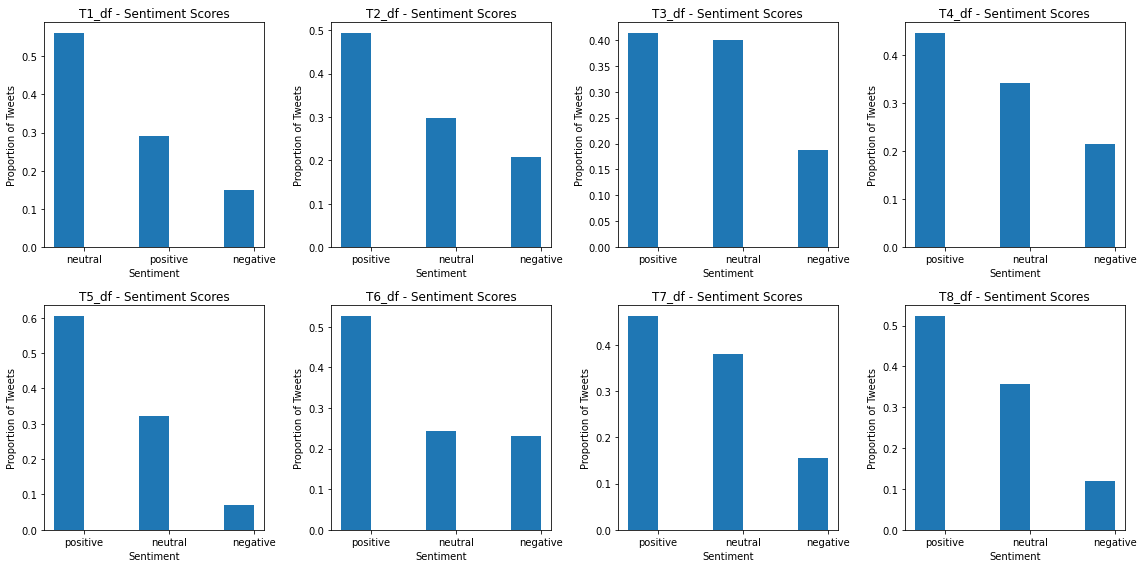

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# List of dataframe names
df_names = ['T1_df', 'T2_df', 'T3_df', 'T4_df', 'T5_df', 'T6_df', 'T7_df', 'T8_df']

# Create a figure with 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.ravel()  # Flatten the axes array

# Iterate over each dataframe and create a side by side bar chart
for i, df_name in enumerate(df_names):
    df = globals()[df_name]  # Get the dataframe by name using globals()
    
    # Calculate the proportion of positive, negative, and neutral tweets in each group
    sentiment_counts = df['sentiment'].value_counts(normalize=True)

    # Create a subplot for the current dataframe
    ax = axes[i]
    
    # Create a bar chart of the sentiment scores
    x_pos = [0, 1, 2]  # x-axis positions for the two groups
    bar_width = 0.35   # width of the bars

    ax.bar(x_pos, sentiment_counts.values, width=bar_width)
    ax.set_title(f'{df_name} - Sentiment Scores')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Proportion of Tweets')
    ax.set_xticks([p + 0.5 * bar_width for p in x_pos])
    ax.set_xticklabels(sentiment_counts.index)

plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest


# create control group and test group
control_topics = ['T1 Competition of Search Engines', 'T4 Writing Styles and prompts', 'T5 Content Creation and Ideas Generation', 'T7 Programming and Gaming']
test_topics = ['T2 Conversational AI and Bias in Data', 'T3 Future of Technology and Impact on Career', 'T6 Impacts on Education and Academia', 'T8 Natural Language Processing']

control_group = df[df['Topic_Name'].isin(control_topics)]
test_group = df[df['Topic_Name'].isin(test_topics)]

# Calculate the proportion of negative sentiment tweets in each group
control_neg_sentiment_prop = control_group['sentiment'].value_counts(normalize=True).get('negative', 0)
test_neg_sentiment_prop = test_group['sentiment'].value_counts(normalize=True).get('negative', 0)

# perform hypothesis testing
count = [control_group['sentiment'].value_counts().get('negative', 0), test_group['sentiment'].value_counts().get('negative', 0)]
nobs = [len(control_group), len(test_group)]
z_stat, p_val = proportions_ztest(count, nobs)
print(f"The difference in proportions is statistically significant (p-value: {p_val:.4f})")
print(f"Proportion of negative sentiment tweets in control group: {control_neg_sentiment_prop:.4f}")
print(f"Proportion of negative sentiment tweets in test group: {test_neg_sentiment_prop:.4f}")


The difference in proportions is statistically significant (p-value: nan)
Proportion of negative sentiment tweets in control group: 0.0000
Proportion of negative sentiment tweets in test group: 0.1189


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\proportion.py:840: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\proportion.py:856: RuntimeWarning: divide by zero encountered in divide
  nobs_fact = np.sum(1. / nobs)
